# <center>PRODUCT PRICE DATASET

<img src='khuc-le-thanh-danh-gFJRgtzPNVc-unsplash.jpg'>

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('./upload-pricequotes202301.csv')
df

,QUOTE_DATE,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
0,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,801,1.30,NaN,NaN,1.130,0.123,11.92,1,202202,999999,2,1,1,1.150,3,2
1,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,802,2.00,NaN,NaN,1.429,0.357,11.92,1,202202,999999,2,1,1,1.400,3,2
2,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,803,1.25,NaN,NaN,1.087,0.083,11.92,1,202202,999999,2,1,1,1.150,3,2
3,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,807,1.30,NaN,NaN,1.153,0.142,11.92,1,202204,999999,2,1,2,1.128,4,2
4,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,808,1.25,NaN,NaN,1.087,0.083,11.92,1,202202,999999,2,1,2,1.150,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139414,202301,640406,HOTEL 1 NIGHT PRICE,1,5105,0.00,T,T,0.000,0.000,0.93,1,202203,999999,13,2,1,97.511,4,13
139415,202301,640406,HOTEL 1 NIGHT PRICE,3,5112,150.00,NaN,NaN,0.935,-0.067,0.93,1,202202,999999,13,2,1,160.400,3,13
139416,202301,640406,HOTEL 1 NIGHT PRICE,3,15451,110.00,NaN,NaN,1.049,0.048,0.93,1,202203,999999,13,1,1,104.850,4,13
139417,202301,640406,HOTEL 1 NIGHT PRICE,3,15689,132.00,NaN,NaN,1.320,0.278,0.93,1,202202,999999,13,2,1,100.000,3,13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139419 entries, 0 to 139418
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   QUOTE_DATE          139419 non-null  int64  
 1   ITEM_ID             139419 non-null  int64  
 2   ITEM_DESC           139419 non-null  object 
 3   VALIDITY            139419 non-null  int64  
 4   SHOP_CODE           139419 non-null  int64  
 5   PRICE               139419 non-null  float64
 6   INDICATOR_BOX       42864 non-null   object 
 7   ORIG_INDICATOR_BOX  41603 non-null   object 
 8   PRICE_RELATIVE      139419 non-null  float64
 9   LOG_PRICE_RELATIVE  139419 non-null  float64
 10  STRATUM_WEIGHT      139419 non-null  float64
 11  STRATUM_TYPE        139419 non-null  int64  
 12  START_DATE          139419 non-null  int64  
 13  END_DATE            139419 non-null  int64  
 14  REGION              139419 non-null  int64  
 15  SHOP_TYPE           139419 non-nul

In [4]:
df.shape

(139419, 20)

In [5]:
df.describe()

,QUOTE_DATE,ITEM_ID,VALIDITY,SHOP_CODE,PRICE,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
count,139419.0,139419.000000,139419.000000,139419.000000,139419.000000,139419.000000,139419.000000,139419.000000,139419.000000,139419.000000,139419.0,139419.000000,139419.000000,139419.000000,139419.000000,139419.000000,139419.000000
mean,202301.0,376649.778997,2.895509,1040.958765,53.166161,1.026850,0.081656,29.656106,1.844254,202204.698040,999999.0,6.724586,1.331999,1.155438,53.015042,3.146451,4.868734
std,0.0,149600.411234,0.648717,2898.435704,250.069136,0.433982,0.234952,30.483255,0.972650,13.149712,0.0,3.422906,0.654715,0.759918,241.652598,0.588139,4.816566
min,202301.0,210102.000000,1.000000,1.000000,0.000000,0.000000,-2.701000,0.000000,0.000000,202202.000000,999999.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,202301.0,212712.000000,3.000000,41.000000,1.350000,1.000000,0.000000,7.740000,1.000000,202202.000000,999999.0,4.000000,1.000000,1.000000,1.750000,3.000000,1.000000
50%,202301.0,430127.000000,3.000000,92.000000,4.450000,1.062000,0.061000,11.360000,2.000000,202202.000000,999999.0,7.000000,1.000000,1.000000,5.000000,3.000000,3.000000
75%,202301.0,510349.000000,3.000000,904.000000,17.600000,1.193000,0.176000,71.650000,3.000000,202202.000000,999999.0,9.000000,1.000000,1.000000,18.000000,3.000000,8.000000
max,202301.0,640406.000000,4.000000,18550.000000,21000.000000,10.734000,2.373000,86.100000,3.000000,202301.000000,999999.0,13.000000,4.000000,21.000000,19971.857000,4.000000,26.000000


In [6]:
df.isnull().mean()*100

QUOTE_DATE             0.000000
ITEM_ID                0.000000
ITEM_DESC              0.000000
VALIDITY               0.000000
SHOP_CODE              0.000000
PRICE                  0.000000
INDICATOR_BOX         69.255266
ORIG_INDICATOR_BOX    70.159734
PRICE_RELATIVE         0.000000
LOG_PRICE_RELATIVE     0.000000
STRATUM_WEIGHT         0.000000
STRATUM_TYPE           0.000000
START_DATE             0.000000
END_DATE               0.000000
REGION                 0.000000
SHOP_TYPE              0.000000
SHOP_WEIGHT            0.000000
BASE_PRICE             0.000000
BASE_VALIDITY          0.000000
STRATUM_CELL           0.000000
dtype: float64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().mean()*100

QUOTE_DATE            0.0
ITEM_ID               0.0
ITEM_DESC             0.0
VALIDITY              0.0
SHOP_CODE             0.0
PRICE                 0.0
INDICATOR_BOX         0.0
ORIG_INDICATOR_BOX    0.0
PRICE_RELATIVE        0.0
LOG_PRICE_RELATIVE    0.0
STRATUM_WEIGHT        0.0
STRATUM_TYPE          0.0
START_DATE            0.0
END_DATE              0.0
REGION                0.0
SHOP_TYPE             0.0
SHOP_WEIGHT           0.0
BASE_PRICE            0.0
BASE_VALIDITY         0.0
STRATUM_CELL          0.0
dtype: float64

In [9]:
df

,QUOTE_DATE,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
16,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,4,45,1.55,C,C,1.223,0.201,13.01,1,202210,999999,3,1,1,1.267,4,3
17,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,1,62,0.00,M,M,0.000,0.000,13.01,1,202203,999999,3,1,1,1.540,4,3
19,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,1,43,0.00,M,M,0.000,0.000,11.92,1,202202,999999,2,1,1,1.250,3,2
21,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,1,3,0.00,M,M,0.000,0.000,13.01,1,202202,999999,3,1,1,1.490,3,3
24,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,1,55,0.00,M,M,0.000,0.000,13.01,1,202206,999999,3,1,1,1.450,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139391,202301,640406,HOTEL 1 NIGHT PRICE,1,18011,0.00,T,T,0.000,0.000,10.83,1,202203,999999,9,2,1,74.856,4,9
139399,202301,640406,HOTEL 1 NIGHT PRICE,1,15671,0.00,T,T,0.000,0.000,4.64,1,202207,999999,11,2,1,146.139,4,11
139401,202301,640406,HOTEL 1 NIGHT PRICE,1,5122,0.00,T,T,0.000,0.000,4.64,1,202203,999999,11,2,1,65.000,4,11
139403,202301,640406,HOTEL 1 NIGHT PRICE,1,333,0.00,T,T,0.000,0.000,7.80,1,202204,999999,12,2,1,131.327,4,12


### UNIVARIATE ANALYSIS

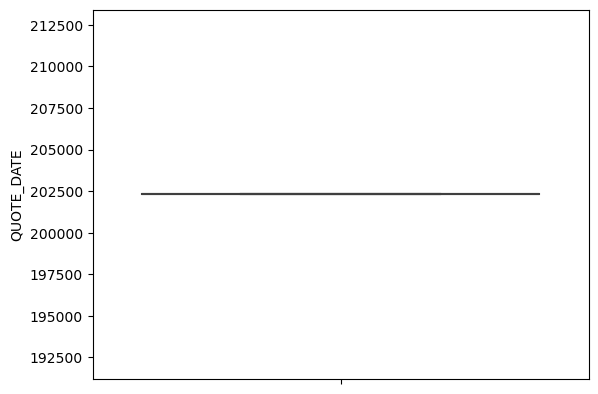

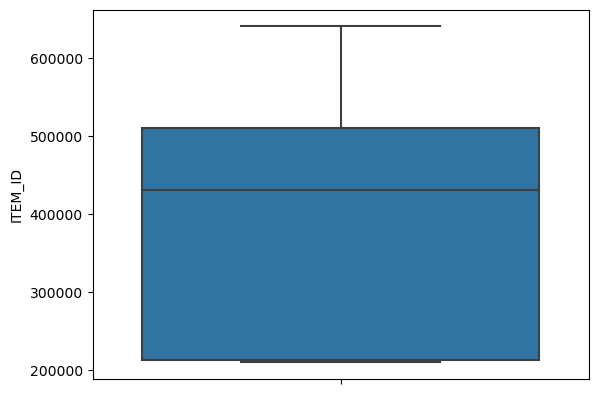

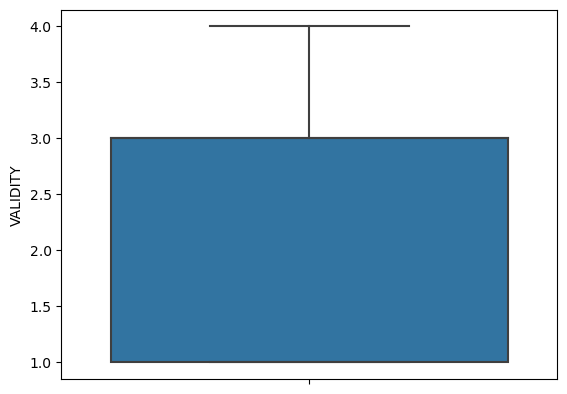

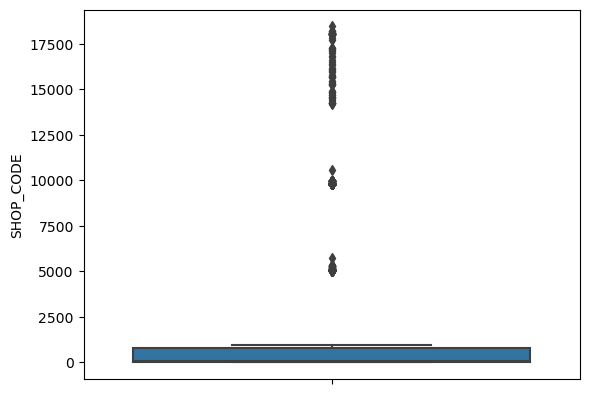

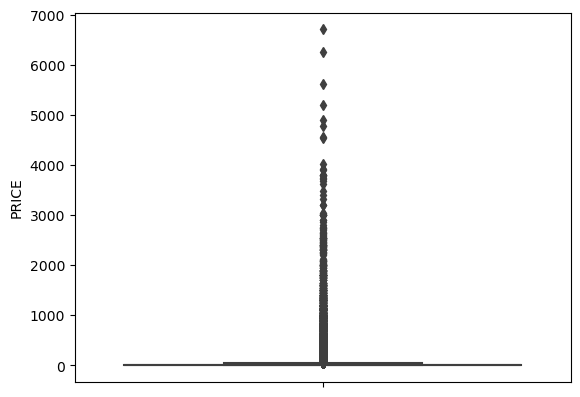

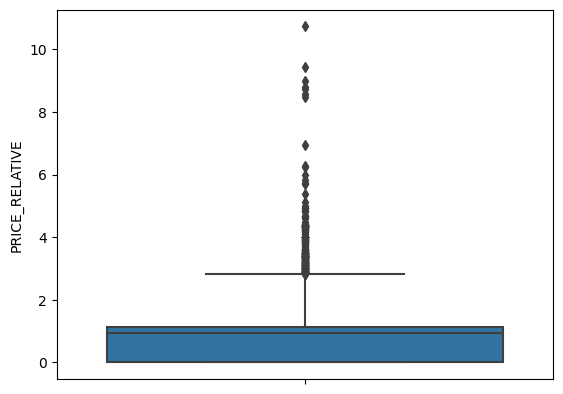

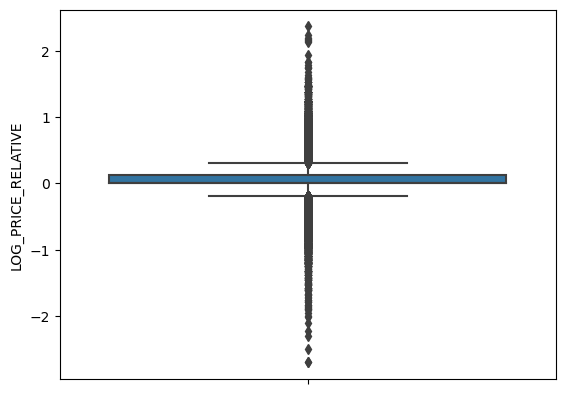

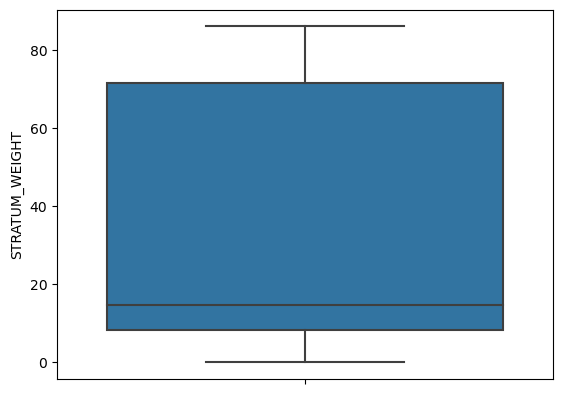

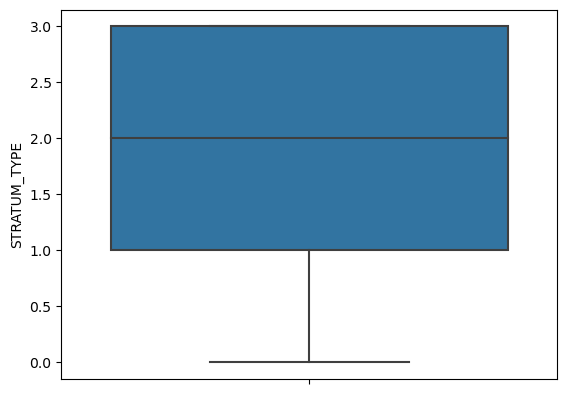

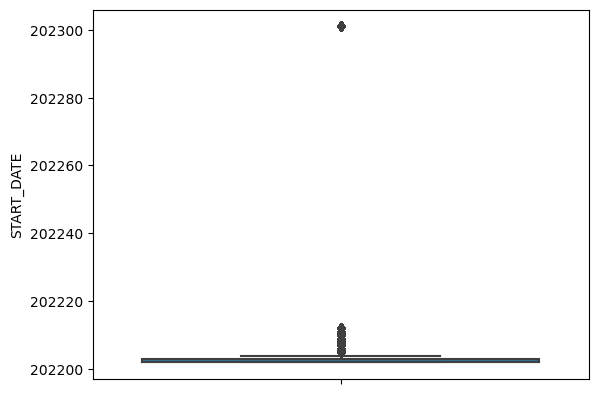

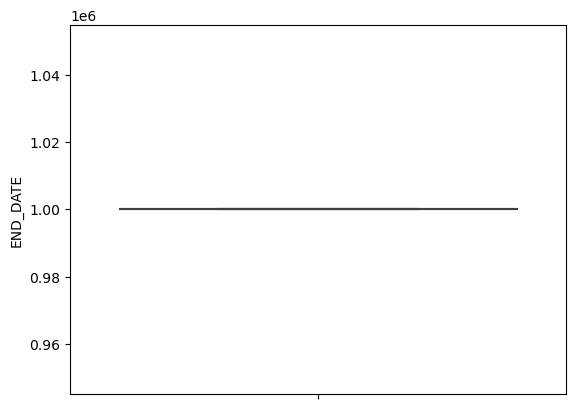

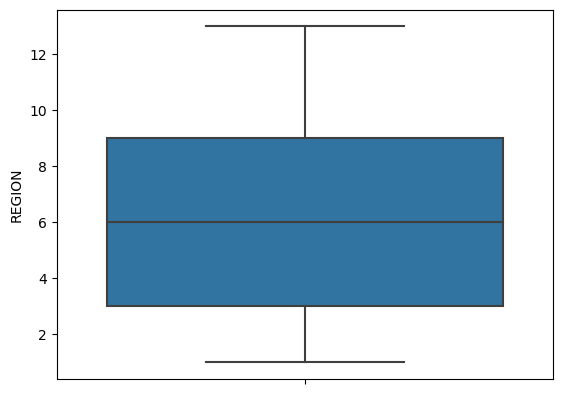

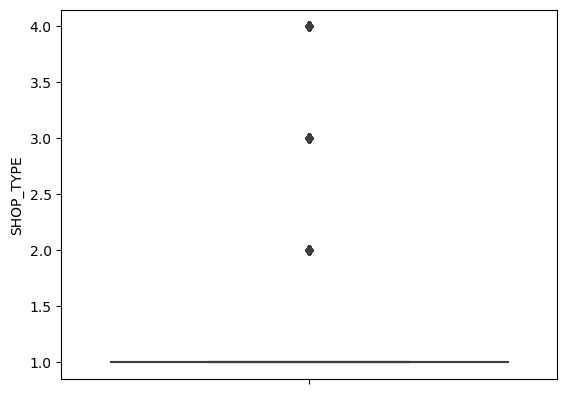

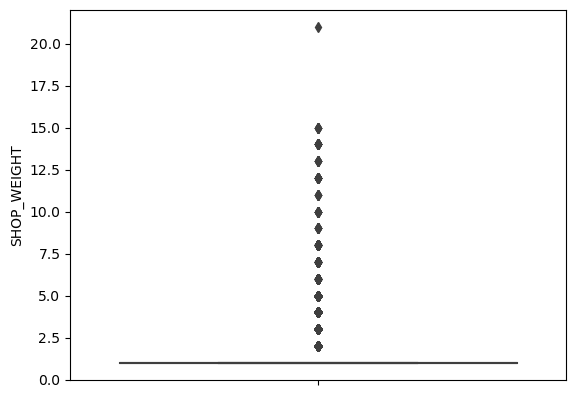

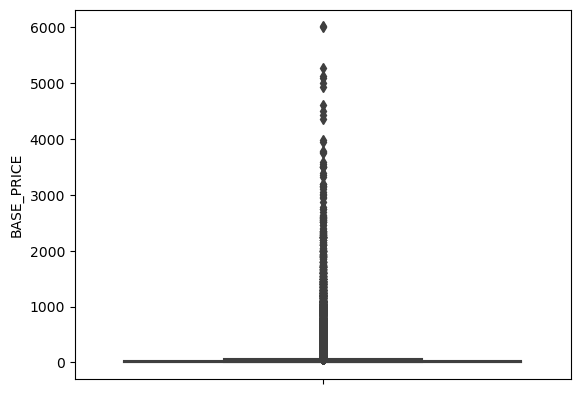

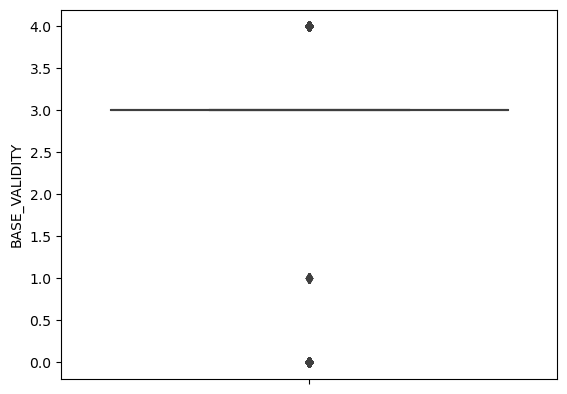

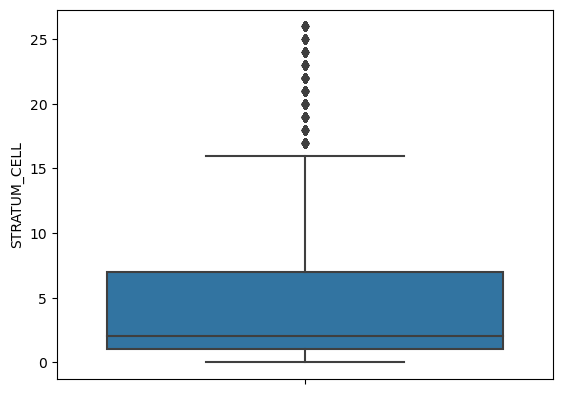

In [10]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show()

In [11]:
df.drop(columns=['QUOTE_DATE','ITEM_ID','ITEM_DESC','INDICATOR_BOX','ORIG_INDICATOR_BOX'],inplace=True)
df

,VALIDITY,SHOP_CODE,PRICE,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
16,4,45,1.55,1.223,0.201,13.01,1,202210,999999,3,1,1,1.267,4,3
17,1,62,0.00,0.000,0.000,13.01,1,202203,999999,3,1,1,1.540,4,3
19,1,43,0.00,0.000,0.000,11.92,1,202202,999999,2,1,1,1.250,3,2
21,1,3,0.00,0.000,0.000,13.01,1,202202,999999,3,1,1,1.490,3,3
24,1,55,0.00,0.000,0.000,13.01,1,202206,999999,3,1,1,1.450,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139391,1,18011,0.00,0.000,0.000,10.83,1,202203,999999,9,2,1,74.856,4,9
139399,1,15671,0.00,0.000,0.000,4.64,1,202207,999999,11,2,1,146.139,4,11
139401,1,5122,0.00,0.000,0.000,4.64,1,202203,999999,11,2,1,65.000,4,11
139403,1,333,0.00,0.000,0.000,7.80,1,202204,999999,12,2,1,131.327,4,12


### TREAT OUTLIERS

In [12]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [13]:
for column in df.columns:
    if df[column].dtype != 'object':
        UL,LL = outlier_limit(df[column])
        df[column]=np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

In [14]:
df.dropna(inplace=True)

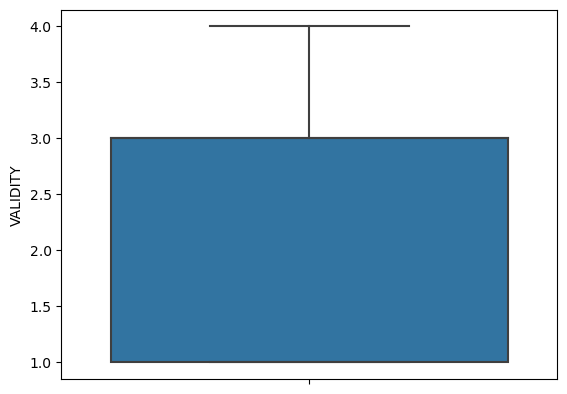

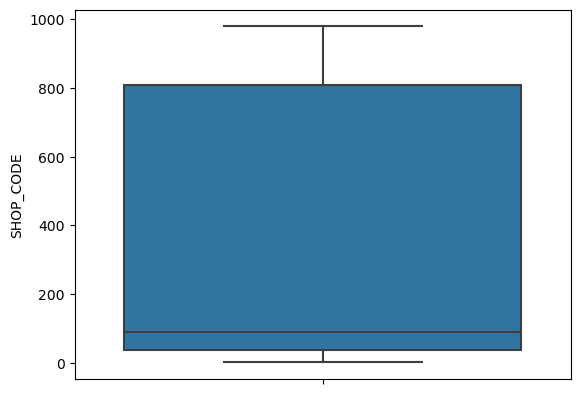

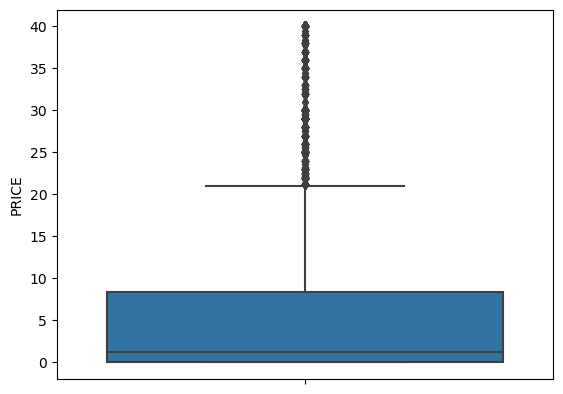

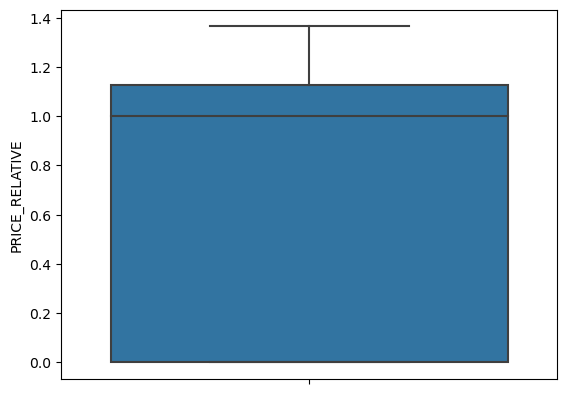

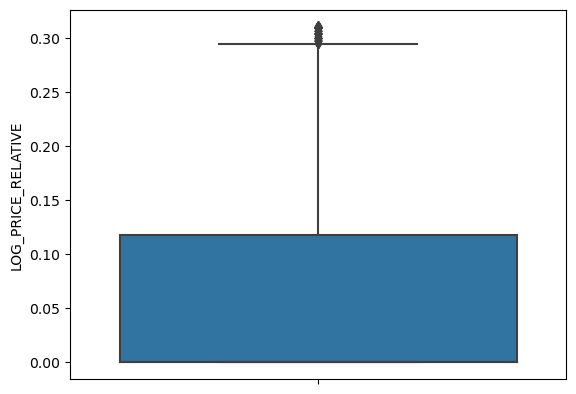

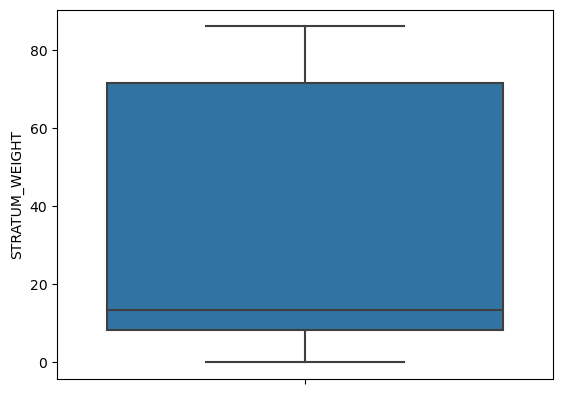

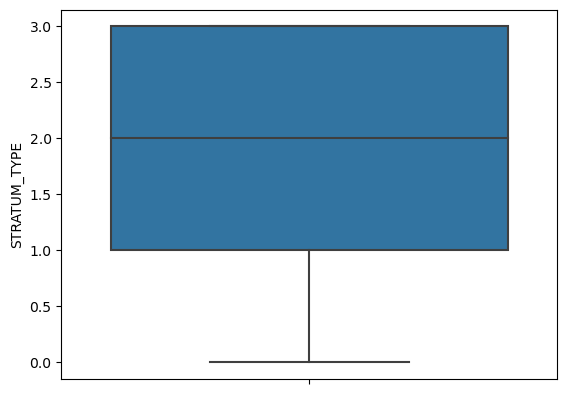

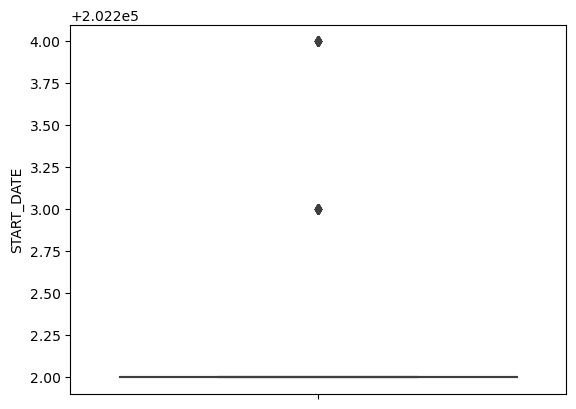

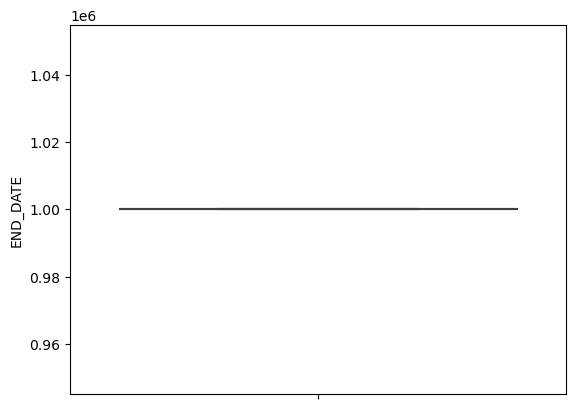

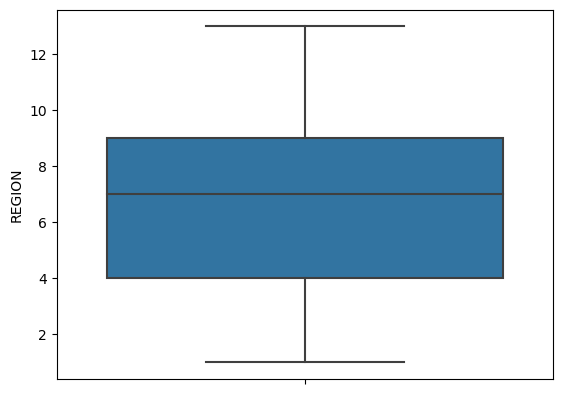

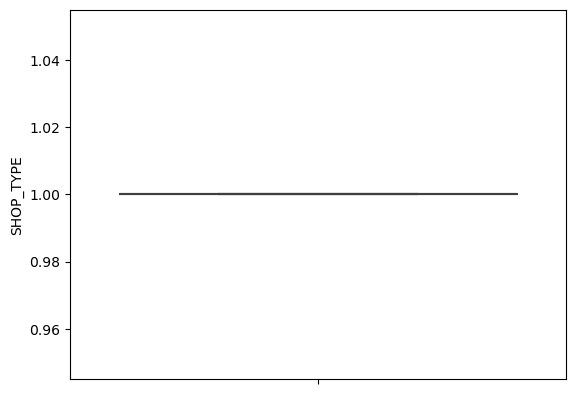

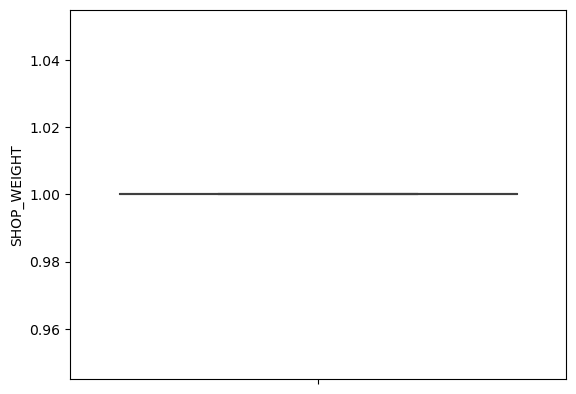

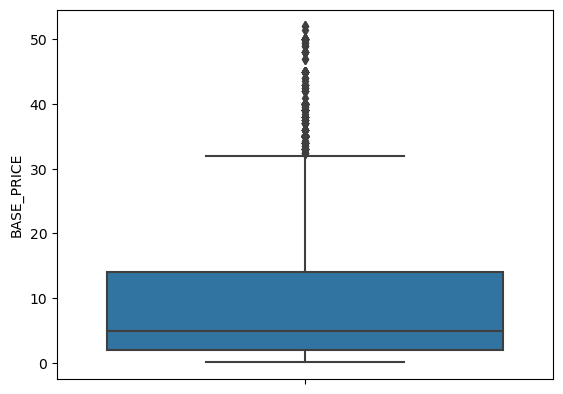

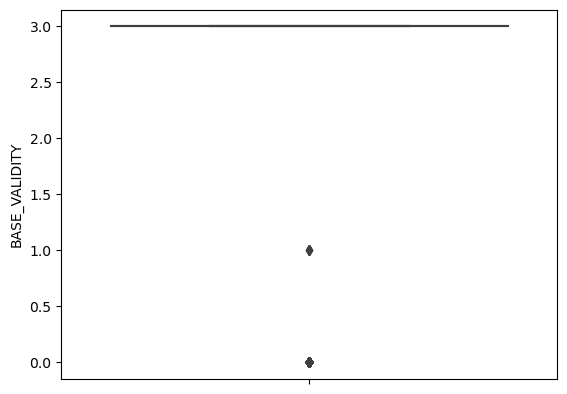

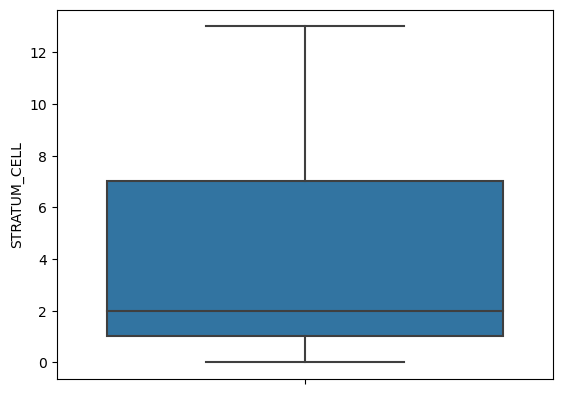

In [15]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show()

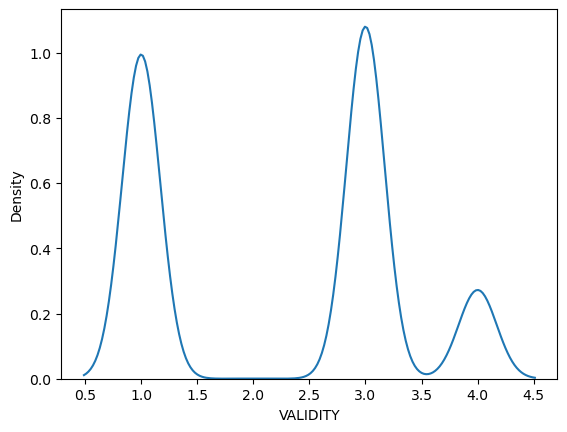

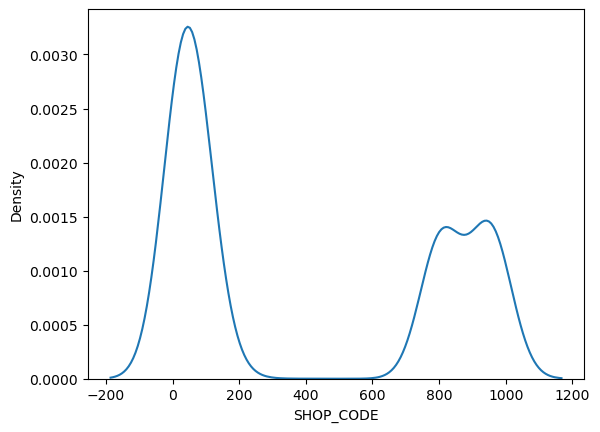

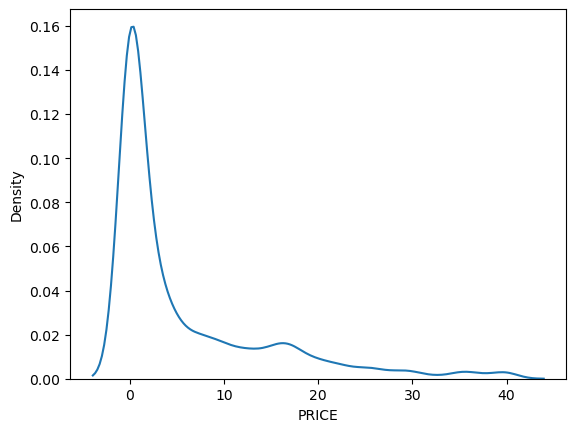

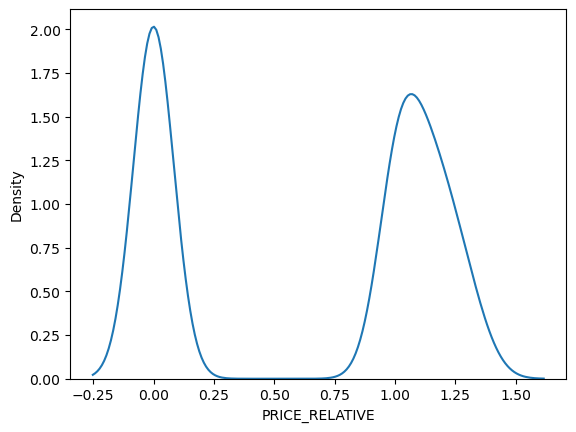

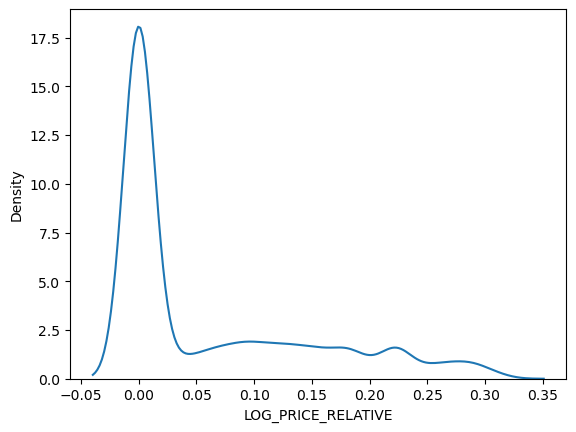

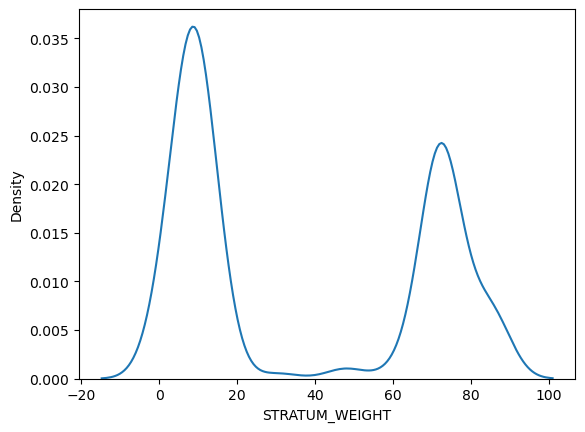

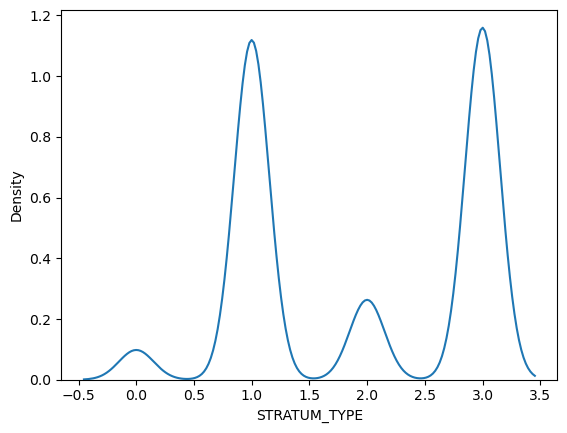

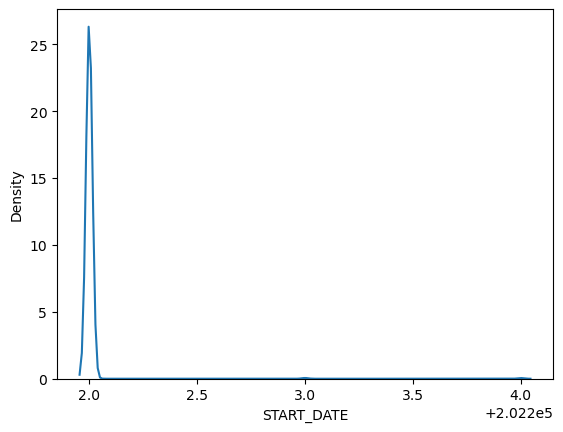

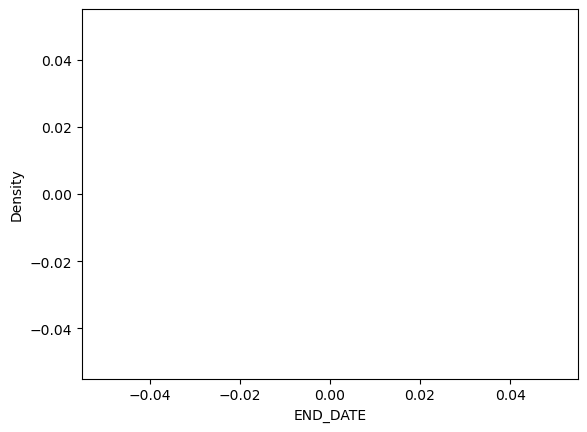

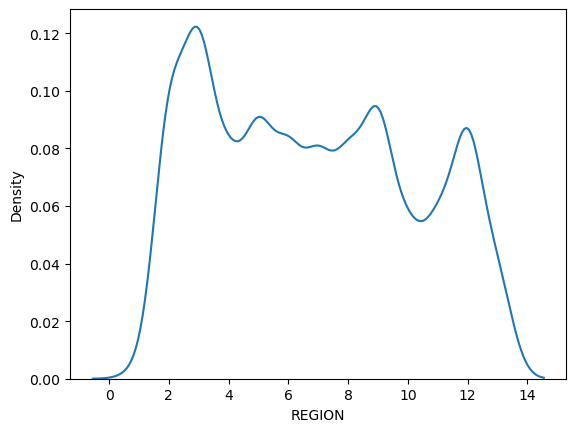

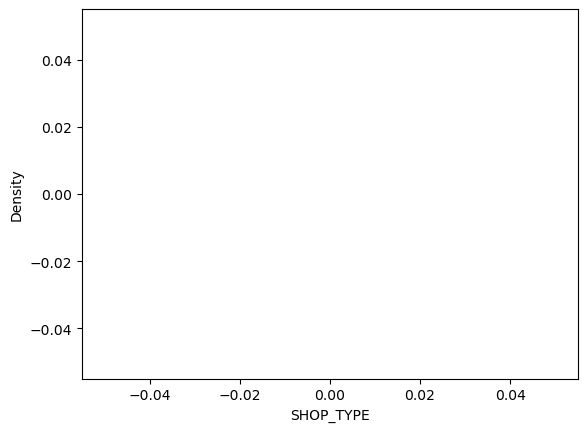

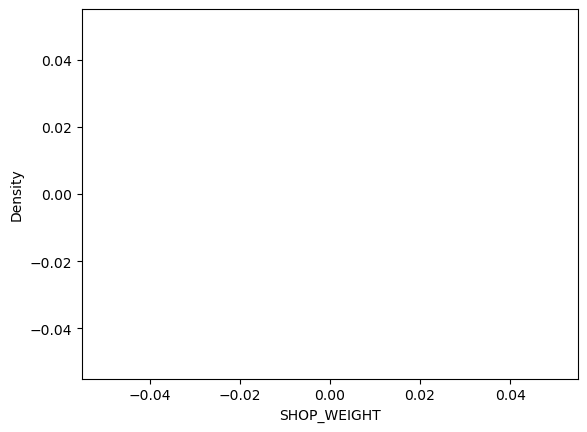

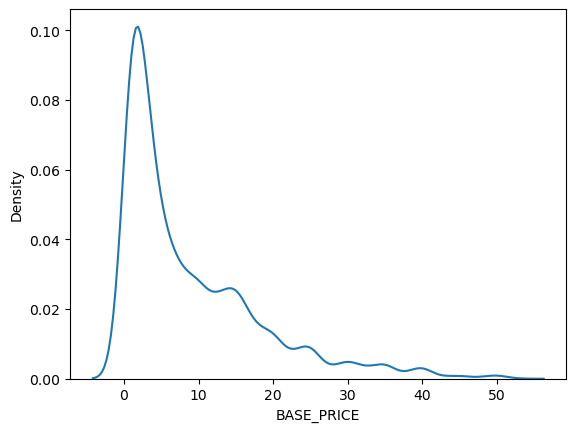

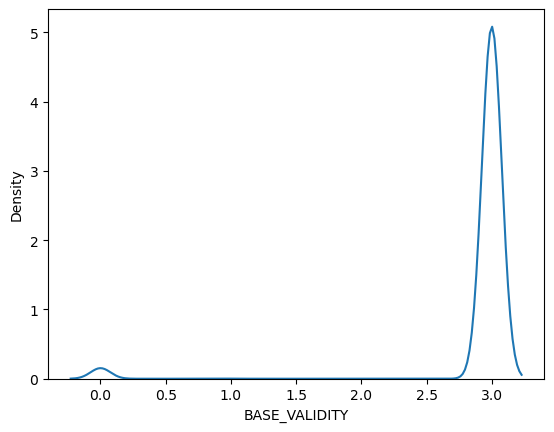

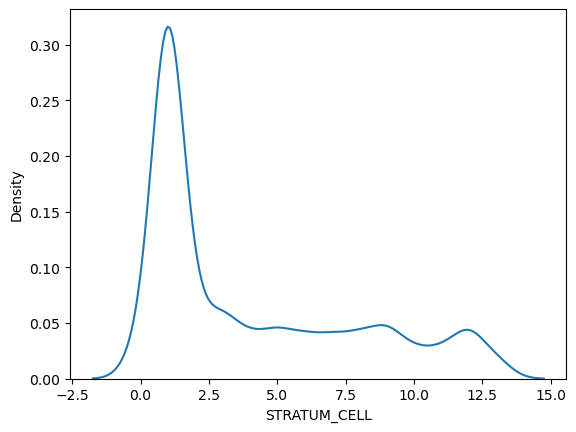

In [16]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.kdeplot(x=df[i])
        plt.show()

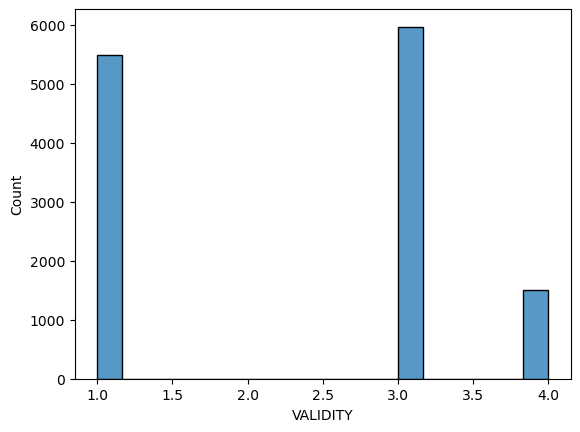

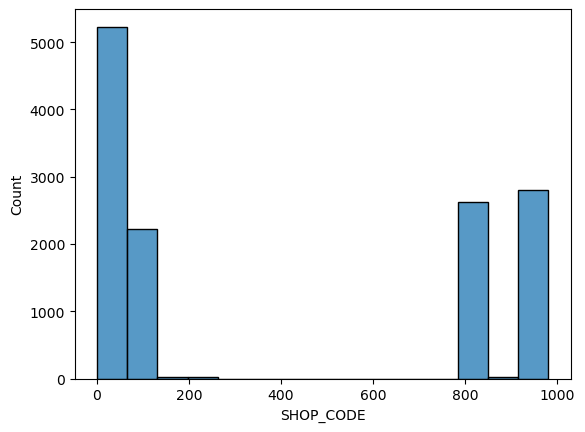

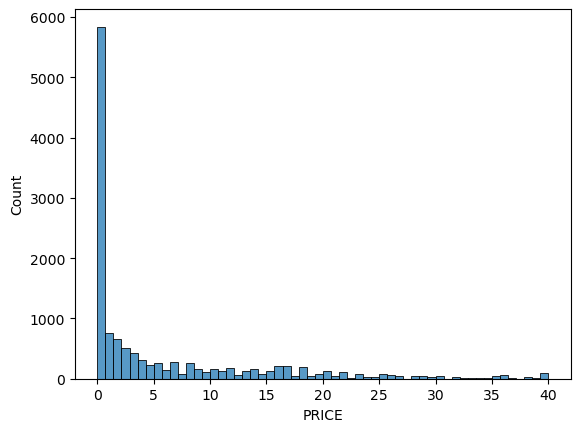

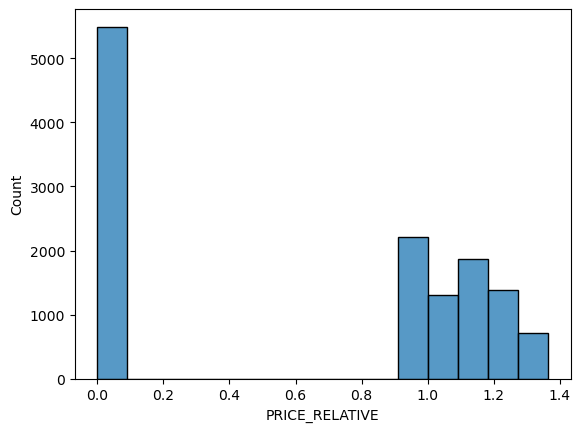

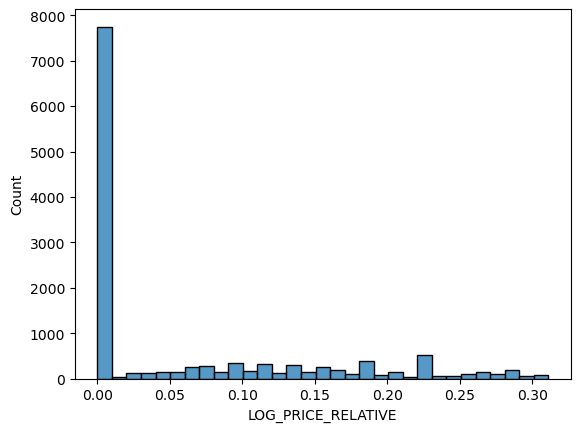

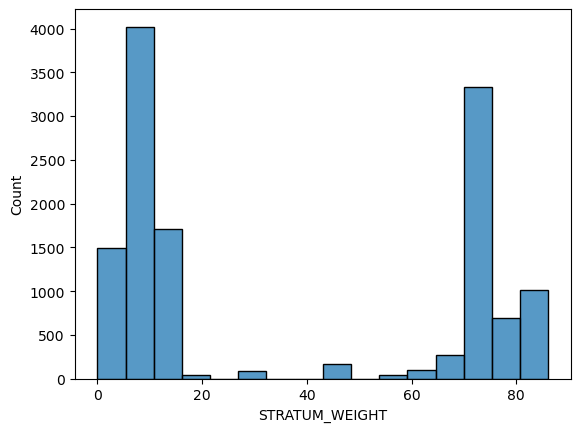

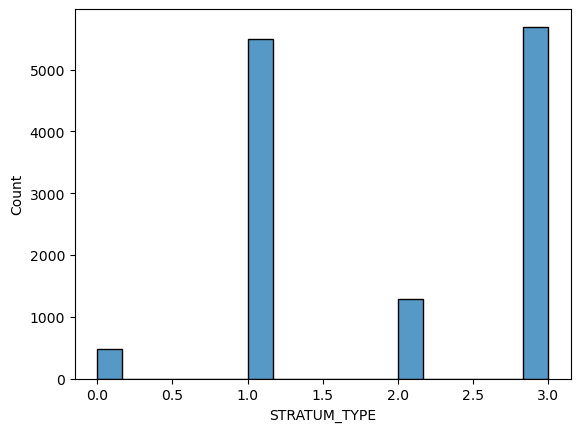

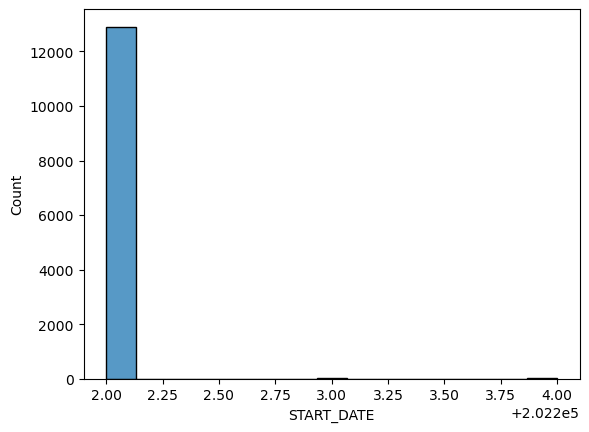

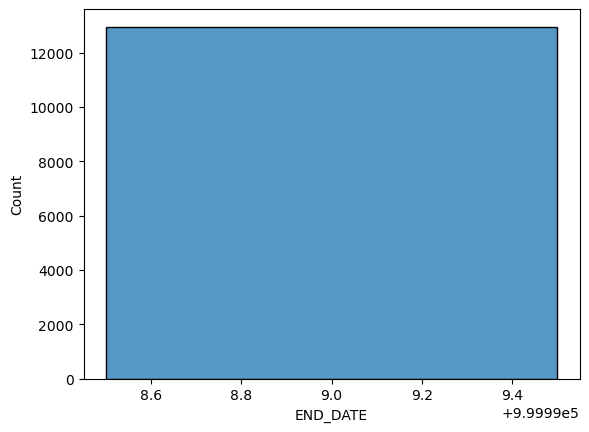

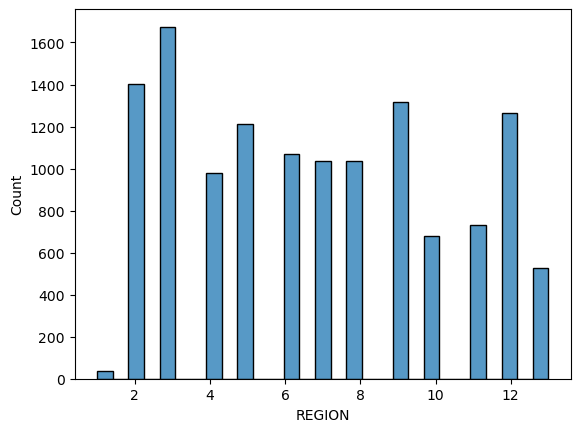

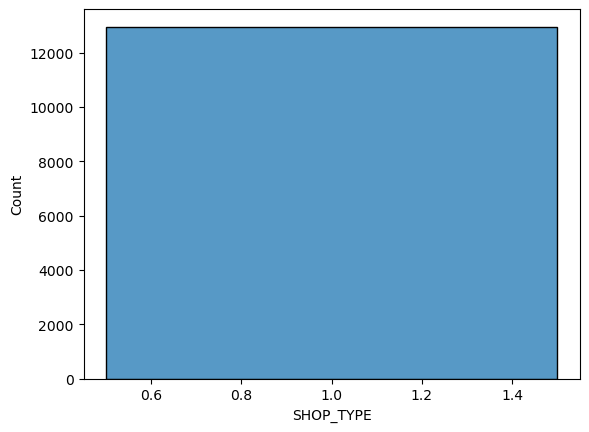

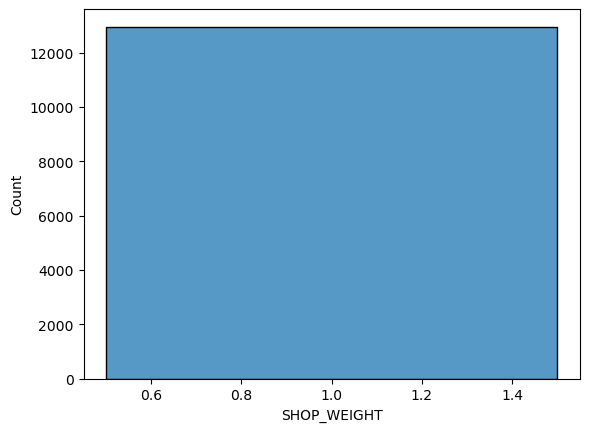

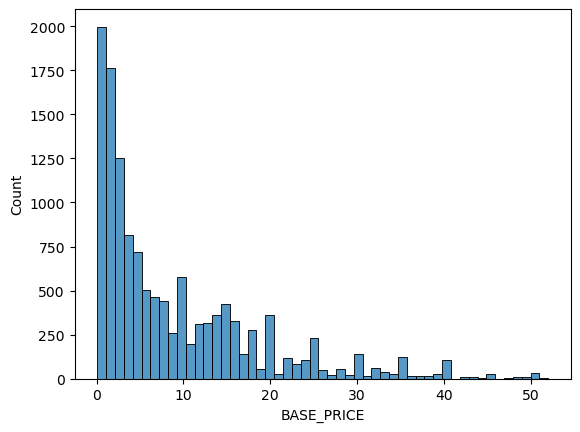

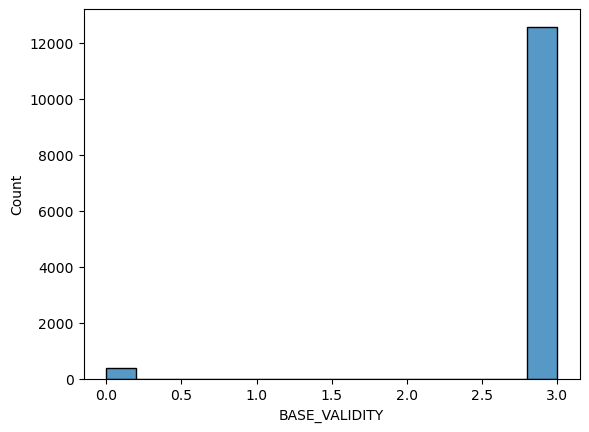

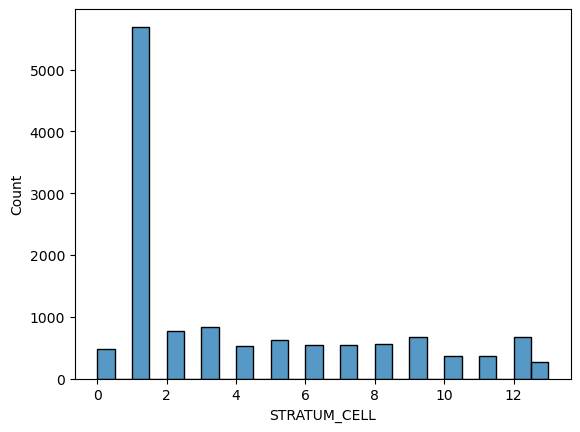

In [17]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.histplot(x=df[i])
        plt.show()

### MULTIVARIATE ANALYSIS

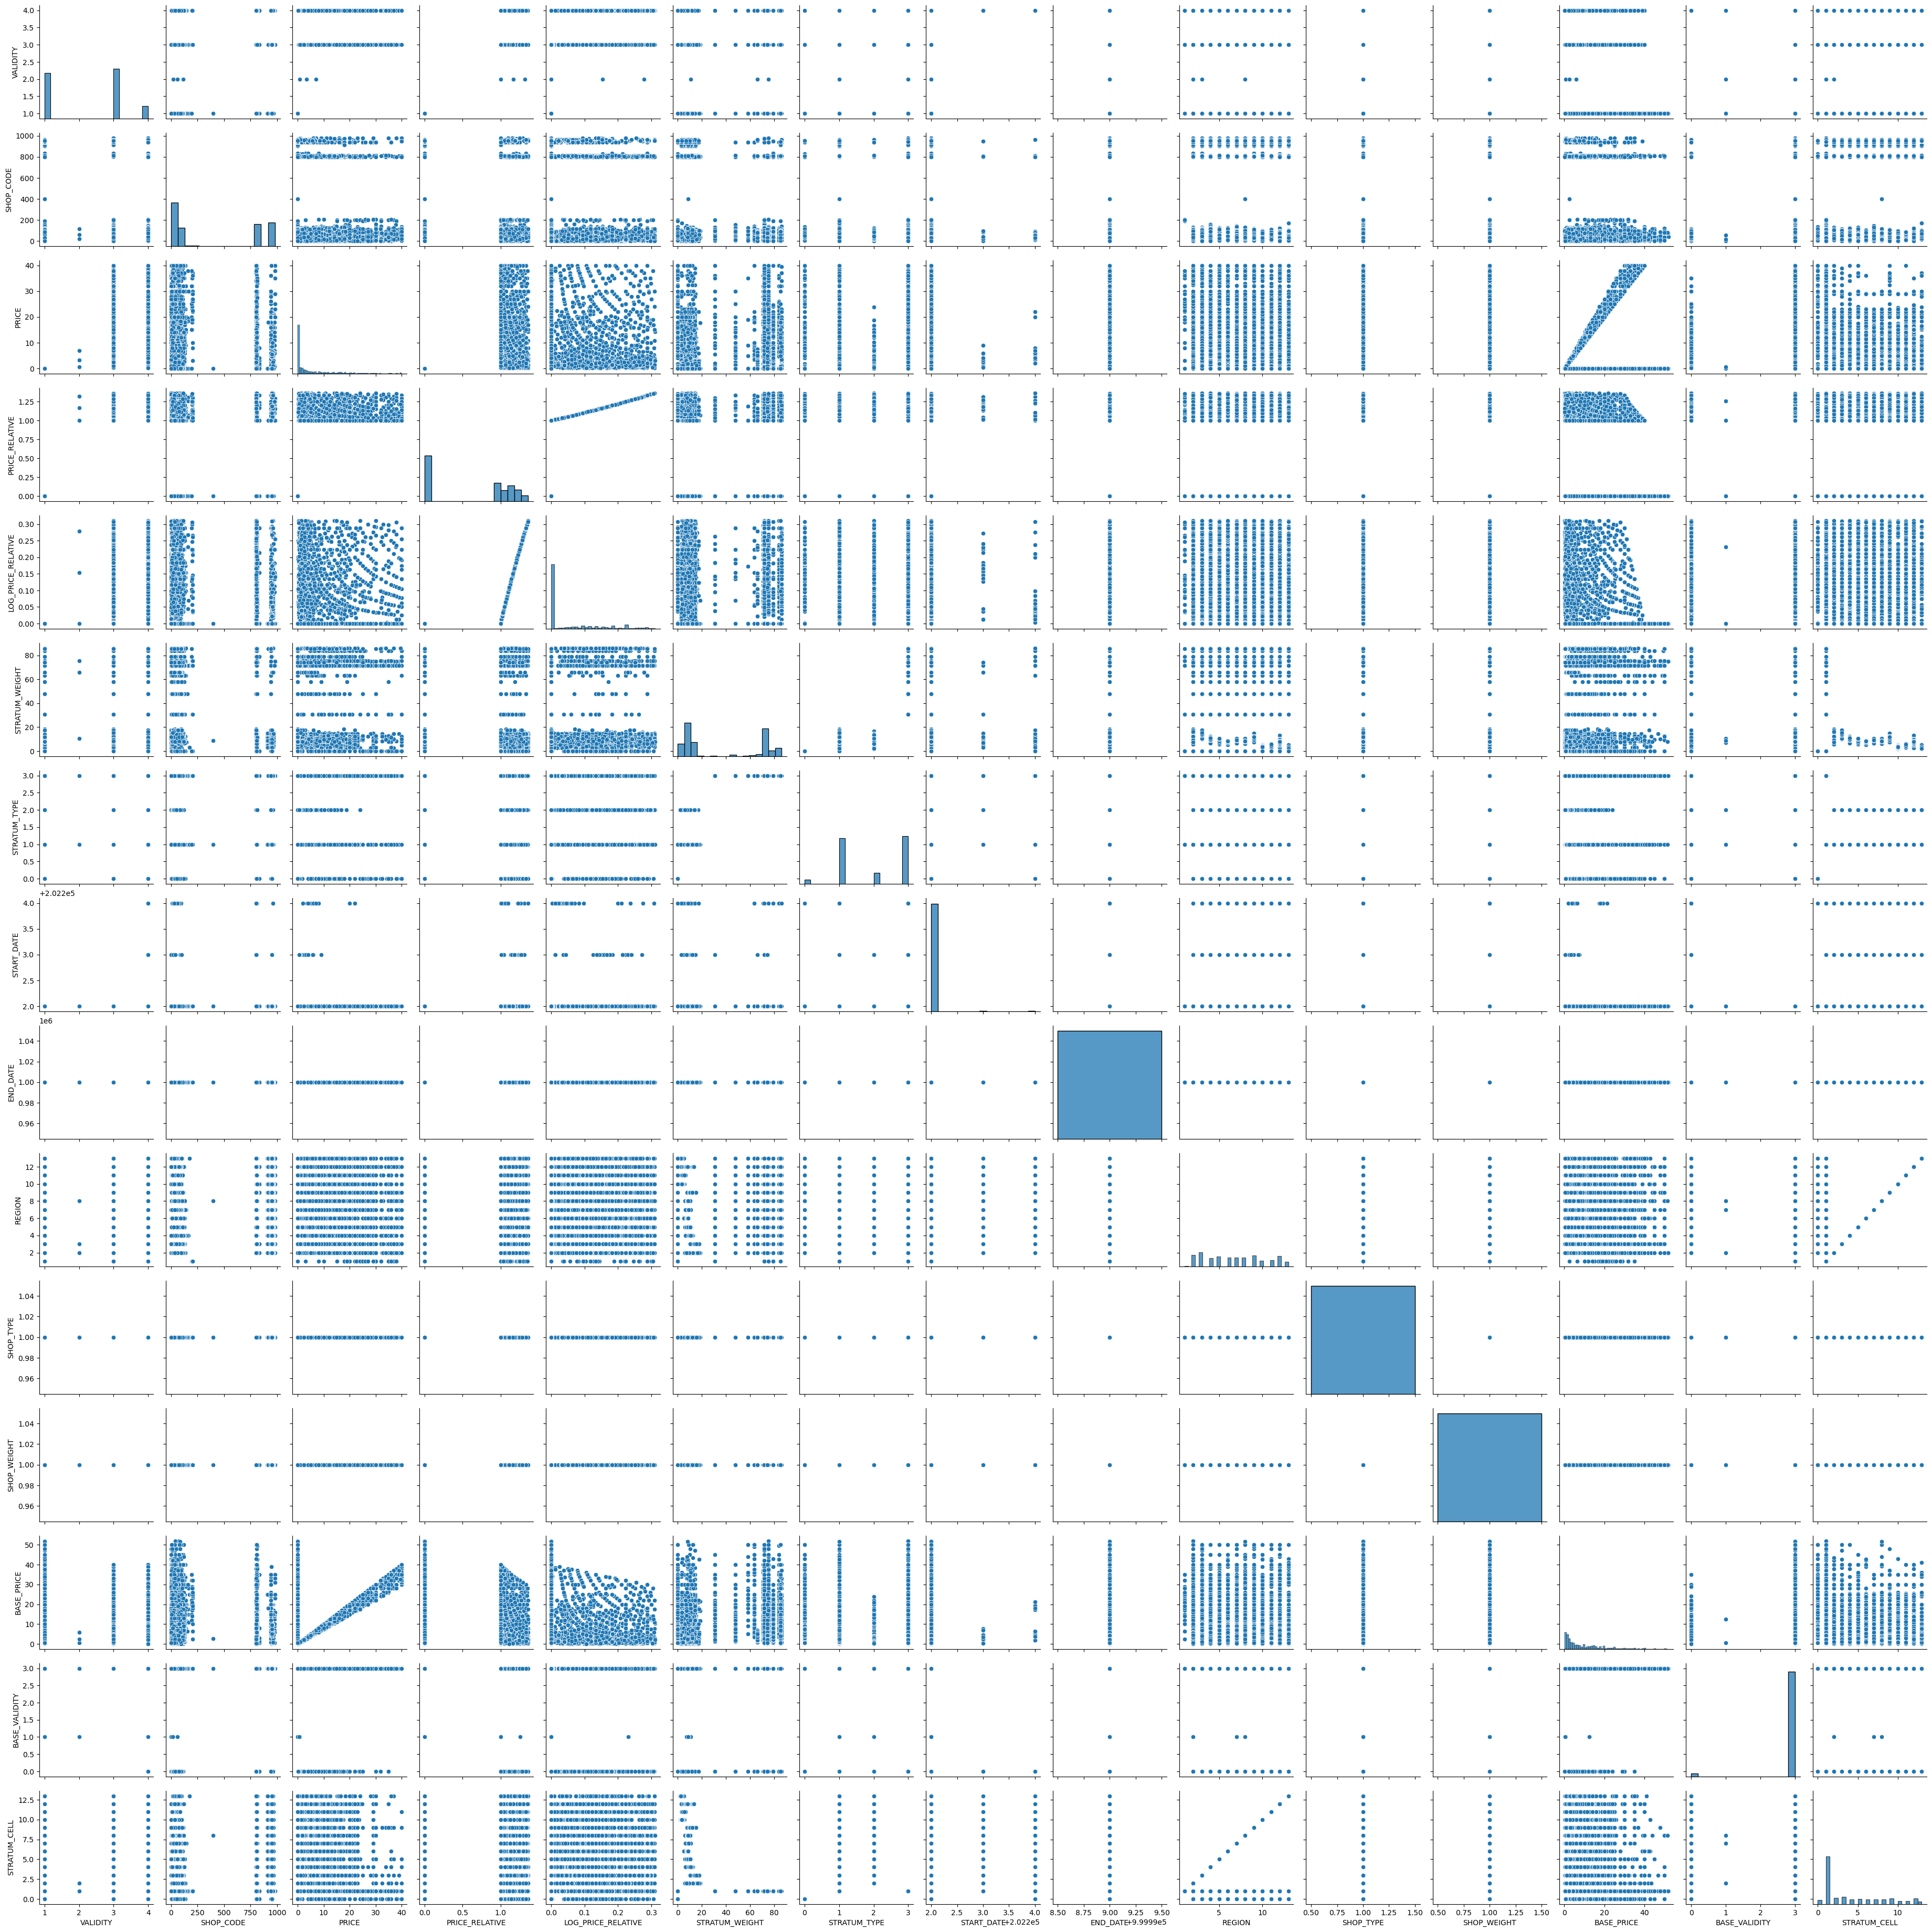

In [19]:
sns.pairplot(df)

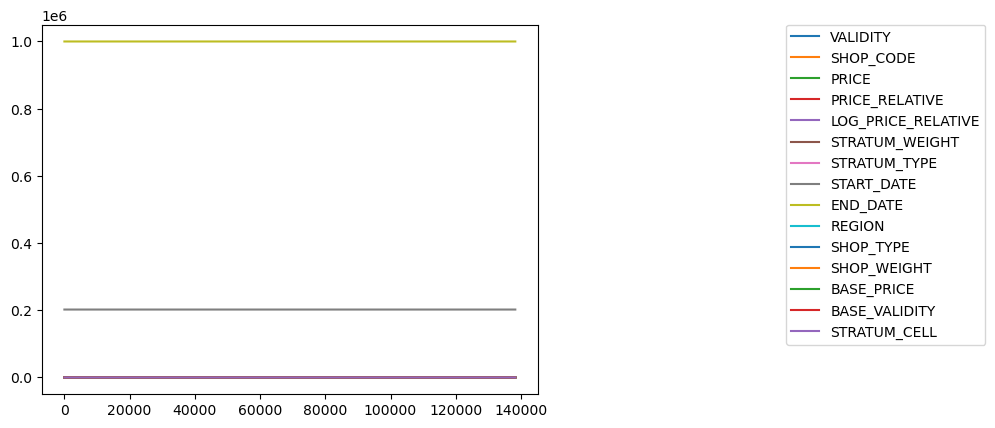

In [20]:
df.plot.line();
plt.legend(bbox_to_anchor=(1.5,1),loc='upper left',borderaxespad=0)
plt.show()

### CHECK THE CORRELATION WITH THE TARGET VARIABLE

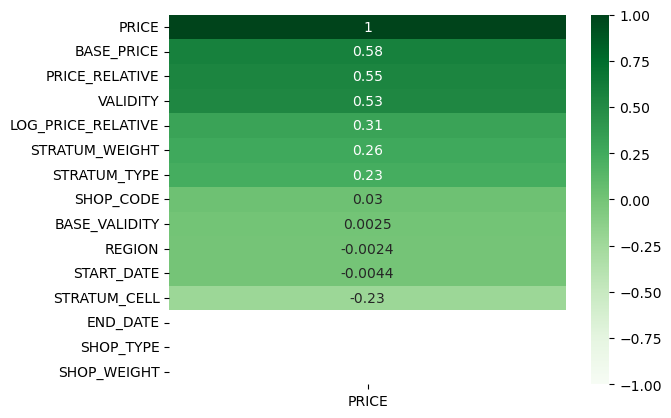

In [22]:
sns.heatmap(df.corr()[["PRICE"]].sort_values(by="PRICE", ascending=False), vmin=-1, vmax=1, annot=True,cmap="Greens");

### TAKE  THE ONLY COLUMNS WHICH HAVE GOOD CORRELATION WITH THE TARGET VARIABLE

In [23]:
x= df[['PRICE_RELATIVE', 'VALIDITY','BASE_PRICE', 'LOG_PRICE_RELATIVE']].values
y = df[['PRICE']].values

### FEATURE SCALING

In [24]:
sc = StandardScaler()
x = sc.fit_transform(x)

### MODEL BUILDING

In [25]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [26]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  5.358612955719009
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  5.358536258290805
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  6.836927813057673
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.1354037600043896
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.2542814743093341
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.3790405137768276
*********************************************

### SINCE THE RANDOMFOREST REGRESSOR HAS MINIMUM RMSE VALUE SELECT THE MODEL 

In [27]:
model = RandomForestRegressor()

In [28]:
model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
y_pred = model.predict(x)
result = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"),dtype=float)
result.sample(5)

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='ACTUAL', y='PREDICTION', data=result,color='blue');